# Building a Neural Network from Scratch!
(Built on the fundamental math behind Deep Learning. NOT just 10 lines of Tensorflow, as much fun as that is.)<br><br>
Credits: MIT PhD candidate Dr. Raj Dandekar<br>
Code written by me, images taken directly from his notes.<br>
<hr>

<h2>Part 1</h2>

<h3> First neuron </h3>
<img src="images/1.1.png">

In [53]:
inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2

output = (inputs[0]*weights[0]) + (inputs[1]*weights[1]) + (inputs[2]*weights[2]) + bias

print("Output: " + str(output))
# The ultimate goal is to come up with the RIGHT weights for each calculation (neuron)
# And then, structure them in the right way (network of neurons).

Output: 2.3


<h3>First <u>Layer</u> of Neurons</h3>
<img src="images/1.2.png">

In [54]:
# Set up
inputs = [1, 2, 3]
weights = [[0.2, 0.8, -0.5],
           [0.5, -0.91, 0.26],
           [-0.26, -0.27, 0.17],
           ]
biases = [2, 3, 0.5]

In [55]:
# Hard coded, WITHOUT loops, just to understand the concept
weights1 = weights[0]
weights2 = weights[1]
weights3 = weights[2]

outputs = [
    (inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + biases[0]), # neuron 1
    (inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + biases[1]), # neuron 2
    (inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + biases[2]), # neuron 3
]

print("Outputs: " + str(outputs))

Outputs: [2.3, 2.46, 0.20999999999999996]


In [56]:
# WITH a loop, for actual use (any number of neurons, layers, inputs, etc.)

outputs = []
for neuron_weights, neuron_bias in zip(weights, biases): 
    # zip() allows parallel looping, to access items in different lists, ideally of the same size
    output = neuron_bias
    
    for input, weight in zip(inputs, neuron_weights):
        output += input*weight
    
    outputs.append(output)

print("Outputs: " + str(outputs))

Outputs: [2.3000000000000003, 2.46, 0.20999999999999996]


<hr>
<h2> Part 2 </h2>


<h3>Single neuron <u>with np.dot</u></h3>

In [57]:
import numpy as np

inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2

output = np.dot(inputs, weights) + bias
print("Output: " + str(output))

AttributeError: 'list' object has no attribute 'astype'

<h3>Entire layer <u>with np.dot</u></h3>

Using Matrix-Vector multiplication!

<img src="images/2.1.png" width="600px">

In [7]:
# Set up (same as part 1)
inputs = [1, 2, 3]
weights = [[0.2, 0.8, -0.5],
           [0.5, -0.91, 0.26],
           [-0.26, -0.27, 0.17],
            ]
biases = [2, 3, 0.5]

outputs = np.dot(weights, inputs) + biases # Each row of weights is multiplied by inputs column, exactly how weights are used 
print("Outputs: " + str(outputs))

# ENTIRE code in part 1 with a loop, is replaced by just ONE line!! SO COOL.

Outputs: [2.3  2.46 0.21]


<h3>Complete batch of data <u>with np.dot</u></h3>

With matrix-matrix multiplication

<img src="images/2.2.png" width="500px" height="255.5px" style="margin-right:10px"><img src="images/2.3.png" width="500px">
<br><br>
<h3><i>But what is a batch?</i></h3>
One batch is the equivalent of one data point, with multiple characteristics.<br>
For example, if predicting house prices, one "batch" = 1 house.<br>
In this case, each house then has 4 characteristics for it (ex: no. of bedrooms, bathrooms, land area, neighourhood avg price)

In [8]:
# each row represents the inputs for one specific neuron
inputs = [[1, 2, 3, 2.5], 
          [2, 5, -1, 2],
          [-1.5, 2.7, 3.3, -0.8]]


# Each row represents the weights for one specific neuron... 
# Later transposed to make sense in sync with how matrix multiplication works - 
# - each row of matrix A multiplied with each COLUMN of matrix B
weights = [[0.2, 0.8, -0.5, 1], 
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

weights = np.array(weights) # np.dot doesnt take lists, so must convert to array

outputs = np.dot(inputs, weights.T) + biases # The bias just adds the number to every item in that column.

print("Outputs: \n" + str(outputs))


Outputs: 
[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


<hr>
<h2>Part 3</h2>
Creating and connecting layers to each other.<br>
The input layer sends 3 data points (batches), with 4 features each.
The output layer gives a single number output for each input data point (batch).

For example,<br>
If we were <b>predicting house prices</b>, in this case, we'd be passing 3 different houses as input...<br>
<b><i>Each house's input =></i></b> Its 4 features - #bedrooms, #bathrooms, square footage, avg house price in locality (as examples)<br>
<b><i>Each house's output =></i></b> Predicted price for the house.

Future Goal: Right now, the weights and biases are all manually+randomly set. Our neural network would actually be functional when they are set based on training data. The trained model would be something like what's given below, with final weights and biases. Then, we'd be able to send new houses as input, and we'd actually get their predicted prices.

<h3> Input Layer + 2 hidden layers of neurons </h3>
<img src="images/3.1.png" width="300px">

In [9]:
import matplotlib.pyplot as plt
## Input Layer
inputs = [[1, 2, 3, 2.5], #3x4 matrix
          [2, 5, -1, 2],
          [-1.5, 2.7, 3.3, -0.8]]

## HIDDEN LAYER 1 => 3 neurons, with 4 weights (equal to number of inputs) and 1 bias each. 
weights1 = [[0.2, 0.8, -0.5, 1],  #3x4 matrix
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases1 = [2, 3, 0.5]

## HIDDEN LAYER 2 => 3 neurons, with 3 weights (now its 3 because inputs are only 3, taken from previous hidden layer) and 1 bias each.
weights2 = [[0.1, -0.14, 0.5], #3x3 matrix
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]
##########################################################

weights1 = np.array(weights1)
weights2 = np.array(weights2)

layer1output = np.dot(inputs, weights1.T) + biases1 # dot product of 3x4 and 4x3 matrices = 3x3 matrix

# layer1output is then passed as INPUT to the 2nd hidden layer, which then gives its output.
layer2output = np.dot(layer1output, weights2.T) + biases2 # dot product of 3x3 and 3x3 matrices = 3x3 matrix

print("Outputs:\n" + str(layer2output)) # Each row is the output for one batch of data...

Outputs:
[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


<h3>Adding final (output) layer</h3>

In [10]:
# Creating final layer with just 1 neuron, so we get a single number as output for each batch of data

weights3 = [[0.2, 0.3, 0.4]]
bias = [0.5]

weights3 = np.array(weights3)

layer3output = np.dot(layer2output, weights3.T) + bias

<h3>Input layer (4 input neurons) -> Hidden layer 1 (3 neurons) -> Hidden layer 2 (3 neurons) -> Output layer (1 output neuron)</h3>

In [11]:
print("Single value output for each input batch:\n" + str(layer3output))

Single value output for each input batch:
[[-0.527435]
 [-2.5766  ]
 [ 0.582514]]


<hr>
<h2>Part 4</h2>

<h3>Generating random data</h3>
Till now, all input data was created by manually typing out 2d Lists / matrices. Also, we had linear data. <br>
Neural networks are trained so they can tackle non-linear data (linear can be solved with just regression anyways).<br>

Now we'll start (non-linear) input data for our experimentation using the nnfs (Neural Networks from Scratch) package.

[]

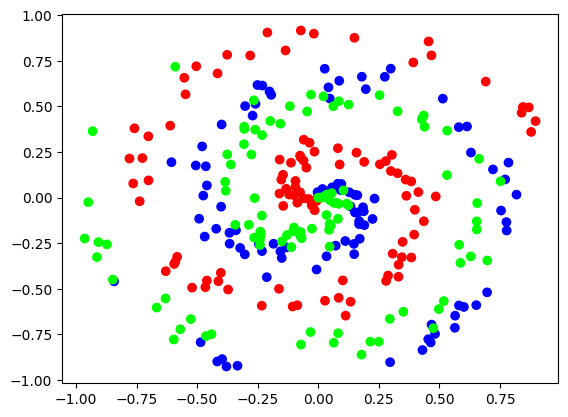

In [12]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
import matplotlib.pyplot as plt

# Getting data from nnfs.. 10 data points with 2 just features (x and y) each (so its easy to display in 2d... previous manual input data couldnt be represented like this since it had 4 features).
X, cf = spiral_data(samples=100, classes=3) # X is a 100x2 matrix with the x and y features. cf is a 1d array with the classification (0, 1, or 2) of each data point.


# Creating a scatterplot with matplotlib
# Values passed - 
# 1) All x coordinate values, All row values in 0th column => X[:,0]
# 2) all y coordinate values, All row values in index 1 column => X[:,1]
# 3) classifications to be used for coloring the data points => c=cf
# 4) cmap is to edit colors... specific options available (another is is "brg" for RGB values) => cmap="gist_rainbow"

plt.scatter(X[:,0], X[:,1], c=cf, cmap="brg")
plt.plot()



<h3>"Dense Layer" Class</h3>
Creating a set class to be able to create layers based on - # neurons and # inputs(for that layer)<br>
<br>
<i>
<b>Note:Switching from matrix dimensions Neurons*Inputs to Inputs*Neurons</b><br>
Till now, each row represented the weights of a single neuron. Now each column will be the weights of one neuron, and the number of columns = number of inputs. (Earlier we would convert to this using transpose)<br>
So, if layer(3 neurons, 4 inputs/features), then 4x3 matrix (earlier it was 3x4).
</i>


In [13]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

class Layer_Dense:
    def __init__(self, num_inputs, num_neurons): #Creates the weights and biases matrix that make up the layer
        self.weights = np.random.randn(num_inputs, num_neurons) #Creates matrix with random weights for now - from 0 to 1 (using Gaussian distribution)
        self.weights *= 0.01 #Keeping weights quite small for now
        self.biases = np.zeros((1, num_neurons)) #Column of zero biases for now
    
    def forward(self, inputs): #Return the actual output, after passing input through the created layer
        self.output = np.dot(inputs, self.weights) + self.biases # Similar to previous manual implementation (except dimension change as mentioned in title "note")


### Using the Dense Layer class created!

X, y = spiral_data(samples = 100, classes = 1)


dense1 = Layer_Dense(2, 3) # 2 features in spiral data, NOT 100 because number of data points / batches doesnt matter, number of features does... 3 neuron layer, output will have 3 features.
dense1.forward(X)

print(X.shape)
print(dense1.output.shape)

print("\n")
print(dense1.output[:5])


(100, 2)
(100, 3)


[[ 0.          0.          0.        ]
 [ 0.00014992 -0.00015354  0.00014944]
 [ 0.00039343 -0.00035618  0.00013883]
 [ 0.00060759 -0.00045617 -0.00029437]
 [ 0.00083074 -0.00063927 -0.00031815]]


<hr>
<h2>Part 5</h2>
Notes for future usage of functions

<h3>np.sum() Array Summation</h3>

Take a matrix A
<ul>
<li>np.sum(A) => Outputs single value with sum of all values in A (axis=none by default)
<li>np.sum(A, axis=0) => Outputs a 1d array that sums the rows (all the vertical numbers are summed), resulting in a single row... Axis=1 leads to summing the columns, resulting in a single column (but it'll still be converted to 1d array, so like a row, unless keepdims=true)
<li>np.sum(A, axis=0, keepdims=true) => "Keep dimensions" => The output remains a 2d array, even though it's just a single row/column...




<h3>Broadcasting</h3>

If both matrices are same size, they can be added anyways!<br>
But if some dimension is 1 or just doesnt exist, i.e its a row/column vector, the row/column just gets duplicated to increase the match the dimensions of the other matrix automatically when you sum them.<br>

<img src="images/5.1.png" width="300px" style="margin-right:10px"><img src="images/5.2.png" width="823px">

<i style="margin-left:315px">(Above image shows importance of keepdims atrribute in np.sum/np.max/etc.^^^^)</i>


<hr>
<h2>Part 6</h2>
<h3>Activation Functions</h3>

Inputs * Weights + Biases => This is a </u>linear</u> function that is run in every hidden layer. <br>
If we only run linear functions on inputs, our outputs will always remain linear, regardless of how many layers we have!
<br><br>
To fit non-linear data, we add "Activation Function" Layers as well in between the hidden layers. These put the output x into some function f(x) and return that to the next layer.<br><br>
<img src="images/6.1.png" width="300px">
<img src="images/6.2.png" width="500px">

<h3>ReLu Activation</h3>
<b>f(x) = max(0, x)</b><br><br>
This function simply copies x, but equals zero instead of letting x become negative.

In [14]:
import numpy as np

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
outputs = np.maximum(0, inputs) # ReLu function
print("ReLu outputs: " + str(outputs)) # 0 or +ve!

ReLu outputs: [0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [15]:
# Creating ReLu activation as a python class
class Activation_ReLu: # No need for any initialization, we dont need to keep any variable like weights, biases, etc... just a function!)
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

<h3>SoftMax Activation</h3>

Converts values into probabilities so each row sums to 1, so we can use them for classification... (Which class has highest probability!)<br><br>
Each output value becomes: <b>e^input_value / e^sum_of_all_feature_input_values</b><br>

<img src="images/6.3.png" width="500px">

In [16]:
inputs = [[1, 2, 3, 2.5],
          [2, 5, -1, 2],
          [-1.5, 2.7, 3.3, -0.8]
          ]

exp_values = np.exp(inputs) # Converting feature values to e^values
outputs = exp_values / np.sum(exp_values, axis=1, keepdims=True) # SoftMax function

print(outputs)
print("\n")
print(np.sum(outputs, axis=1, keepdims=True)) # Values in each row sum to 1, which means we're now successfully dealing with probabilities!



[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


[[1.]
 [1.]
 [1.]]


<h3>Slight edit</h3>
While the previous code explains all the theory of SoftMax, we make one edit in practical usage.<br>
We first subtract each number with the largest number in that row (subtracting with largest feature value)... <br>
This is simply to reduce the overall size of the numbers, which become quite big when using them as powers of e. Since all numbers are reduced the same way, it doesnt affect the overall probabilities.<br><br>
<i>Technically, we can even just subtract a constant value from each number, but that's an issue because we dont know how big these numbers are. Using max values helps.. We can even take average in that sense, but max is best, since we're reducing as much as possible. Just taking the MAX_INT wouldnt work either, since then we might just end up with really large negative numbers to handle - equally useless</i>

In [17]:
# Implementation with the edit

edited_inputs = inputs - np.max(inputs, axis=1, keepdims=True) # Subtracting with max value of the features (in each row)

exp_values = np.exp(edited_inputs) # Converting feature values to e^values

outputs = exp_values / np.sum(exp_values, axis=1, keepdims=True) # SoftMax function, e^value / e^sum_of_all_feature_values
# Also! np.sum leads to a single column vector... the division is working because of Broadcasting!!!!! The column gets copied along horizontally. That's also why we need keepdims.

print(outputs)
print("\n")
print(np.sum(outputs, axis=1, keepdims=True)) # Values in each row sum to 1, which means we're now successfully dealing with probabilities!
# Output remains the same, but calculations use smaller numbers, which makes the system more reliable! (Has to do with how the numbers are stored in bytes and can overflow if very large... Going too deep now, really dont want to discuss comp architecture lol)

[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


[[1.]
 [1.]
 [1.]]


In [18]:
# Creating Softmax activation as a python class

class Activation_SoftMax:
    def forward(self, inputs): # Working taken from and explained above!
        edited_inputs = inputs - np.max(inputs, axis=1, keepdims=True)
        exp_values = np.exp(edited_inputs)
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

<hr>
<h2>Part 7</h2>


<h3>Passing data through multiple dense and activation layers (Forward pass)</h3>
<img src="images/7.1.png" width="459px" style="margin-right:10px">
<img src="images/7.2.png" width="500px"><br>
<i style="font-size:12px">*Technically, activation functions arent considered layers, but this makes the explanation and visual understanding much easier.</i>

In [19]:
# Create inputs
X, y = spiral_data(samples=100, classes=3)

print("Inputs (coordinates): ")
print(X[:5]) # Input! (First 5 rows)
# Gives x and y coordinate values as features for each data point, and the output is the color/classification of the data point (3 classes = 3 colors)
print("\n")

# Create layers
dense1 = Layer_Dense(2, 3) # 2 inputs/features, 3 outputs
activation1 = Activation_ReLu() # 3 inputs, 3 outputs (activation functions dont return different number of outputs, since they're not based on neurons)
dense2 = Layer_Dense(3, 3) # 3 inputs, 3 outputs
activation2 = Activation_SoftMax() # 3 inputs, 3 outputs (final)

# Passing data through these hidden layers
dense1.forward(X)
activation1.forward(dense1.output) 
dense2.forward(activation1.output)
activation2.forward(dense2.output) # Output layer

print("Outputs (probability of the color): ")
print(activation2.output[:5]) # Final output! (First 5 rows)
# Represents proabilities of each data point being red, blue, or green! (Right now all random/similar, since model isnt trained - we havent used training data colors to understand the pattern)

Inputs (coordinates): 
[[-0.          0.        ]
 [-0.0027207   0.0097277 ]
 [ 0.01854933  0.00800275]
 [ 0.02618375  0.015254  ]
 [ 0.03931247  0.00932827]]


Outputs (probability of the color): 
[[0.33333334 0.33333334 0.33333334]
 [0.33333337 0.33333343 0.33333322]
 [0.33333313 0.3333332  0.33333367]
 [0.33333313 0.33333322 0.3333336 ]
 [0.33333275 0.3333328  0.33333442]]


<hr>
<h2>Part 8</h2>
Loss and Accuracy

<h3>Loss</h3>
Creating a Loss Class to calculate loss based on the actual and predicted outputs. (We'll work towards reducing this loss later)

<h3>Categorical Cross Entropy Loss</h3>

Used popularly for classification tasks, where the outputs are predictions. 

The equation is:

$$ \sum (actual)*-log(predicted) $$

Basically if one data point is actually blue, the actual output would be [0 1 0] and if the predicted is [0.1, 0.7, 0.2], then the loss for it owuld be -log(0.7), because that's the only one that would remain after others are multiplied by 0.

So, really, this is is just:
$$ -log(x) $$

<center>
where x = probability given to the ACTUAL output<br><br>
<img src="images/8.1.png" width="500px">
</center><br>

Ultimately an average is taken of the losses in each data point.
<br><br>


<i>Note: There are multipe others ways to calculate loss. For example with normal regression, <b>Mean Squared Error Loss</b> for each data point just subtracts the actual and predicted output, then squares it.</i>


In [20]:
predicted_outputs = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])

In [21]:
### CASE 1 ###

# One method of receiving y is through categorical labels, where each category is given a label, and a single array is sent

y_categorical_labels = [0, 1, 1] # So actual colors here for each data point are Red, Blue, and Blue respectively.

# We're selecting the (row, column) from the predicted_outputs, but doing it three times by using an array
# So we select (0,0), (1,1), and (2,1)... and are returned all these values in an array

# So we go through each row, and select the correct column to get an array of all correct prediction probabilities
print(predicted_outputs[[0, 1, 2], [0, 1, 1]]) 

# [0, 1, 2] is just to go through each row..
print(f"Array to go through each row: {np.array(range(len(predicted_outputs)))}") # range of the length does the same job.. taking range of the number of rows.

# So, we can do this instead:
print(predicted_outputs[range(len(predicted_outputs)), y_categorical_labels]) 

[0.7 0.5 0.9]
Array to go through each row: [0 1 2]
[0.7 0.5 0.9]


In [22]:
### CASE 2 ###

# We may also receive y through one hot encoding 
# (Entire matrix is returned.. actual value in each row is labelled 1, rest are all labelled 0

y_one_hot_encoded = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0] # One Hot Encoded version for the same output as y_categorical_labls above!
])

In [23]:
# np.dot leads to matrix multiplication, just using * leads to each corresponding element to be multiplied like in matrix addition/subtraction
element_wise_multiplied = y_one_hot_encoded*predicted_outputs
print(element_wise_multiplied) # Only correct values remain
print("\n")
# Now converting to similar 1-d array as before...
# Summing all values in each row, when they'll all be 0 except the actual one. So we get the same output as in case 1
print(np.sum(element_wise_multiplied, axis=1)) # Note that we wanted 1d array so didnt use "keepdims=True"


[[0.7 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.9 0. ]]


[0.7 0.5 0.9]


In [24]:
class Loss_CategoricalCrossEntropy:
    def individual_losses(self, y_pred, y_actual):
        
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7) # Any values less than 0.0000001 or greater than 0.9999999(i.e. 1-0.0000001) will be set to these limits.
        # If any prediction is exactly 0, our log becomes infinite/undefined, and if its 1, our log becomes 0, which are both problematic.. so we switch them to very close values

        ### CASE 1 ###
        if len(y_actual.shape) == 1: # If given as 1-d categorical_labels array
            correct_probabilities = y_pred[range(len(y_pred)), y_actual] # Same as done in case 1 above
            return -1*np.log(correct_probabilities)
        
        ### CASE 2 ###
        elif len(y_actual.shape) == 2: # If given as 2-d one-hot-encoded matrix
            element_wise_multiplied = y_actual*y_pred
            correct_probabilities = np.sum(element_wise_multiplied, axis=1) # Same as done in case 2 above
            return -1*np.log(correct_probabilities)

    # Gives final loss
    def loss(self, y_pred, y_actual):
          losses_arr = self.individual_losses(y_pred, y_actual)
          return np.mean(losses_arr)           

<h3>Accuracy Function</h3>
Much simpler calculation where we just check how many of our predictions were correct!<br>
In this case, we arent utilizing the probability that our model gave for the correct color, as long as it just guess right (gave highest probability to the correct color, no matter what that probability was)

In [34]:
class Accuracy:
    def calculate(self, y_pred, y_actual):
        if len(y_actual.shape) == 1: # Case 1: Category labelled in 1D dont need to change anything there
            predictions = np.argmax(y_pred, axis=1) # Takes the index of the maximum value i.e. the category given max probability
            return np.mean(predictions == y_actual)

        if len(y_actual.shape) == 2: # One hot encoded in 2D
            y_actual = np.argmax(y_actual, axis=1) # In THIS CASE, argmax is used for a different purpose, to first convert the 2D matrix to 1D, where index value for the 1 in each row is taken...
            predictions = np.argmax(y_pred, axis=1)
            return np.mean(predictions == y_actual)


In [51]:
# Using the Loss class AND accuracy function we made!! (Simple example to check)

y_pred = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])

# Creating both formats of y_actual to see if the functions work with both! Can also switch the one used below for each... We'll get the same outputs!
y_actual_1d = np.array([0, 1, 1])
y_actual_2d = np.array([[1, 0, 0],
 [0, 1, 0],
 [0, 1, 0]])


loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.loss(y_pred, y_actual_2d)
print(f"Loss: {loss}")

accuracy_function = Accuracy()
accuracy = accuracy_function.calculate(y_pred, y_actual_1d)
print(f"Accuracy: {accuracy}") # Accurayc is just 1 as long as all are guessed correctly... this doesnt tell us as much as the loss function does, which is why we use THAT for optimization when training the model!


Loss: 0.38506088005216804
Accuracy: 1.0


In [52]:
### Going through full forward pass AND calculating loss + accuracy

X, y = spiral_data(samples=100, classes=3)

# Creating Layers
dense1 = Layer_Dense(2, 3) # 2 features, 3 outputs
activation1 = Activation_ReLu() # 3 inputs, 3 outputs
dense2 = Layer_Dense(3, 3) # 3 inputs, 3 outputs
activation2 = Activation_SoftMax() # 3 inputs, 3 outputs (final)

# Passing data through the layers
dense1.forward(X)
activation1.forward(dense1.output) 
dense2.forward(activation1.output)
activation2.forward(dense2.output) # Output layer

predictions = activation2.output

print("Outputs (probability of the color): ")
print(predictions[:5]) # Final output! (First 5 rows) Red, Blue, or Green? (In that order)
print("\n")


# Calculating Loss
loss_function = Loss_CategoricalCrossEntropy()
individual_losses = loss_function.individual_losses(predictions, y) # Gives entire array of loss for each data point
print(f"Array of loss at each data point (first 5): {individual_losses[:5]}")

# Gives overall average loss (ulimtately used in gradient descent or some other form of opimtization... This average loss is what we try to reduce!)
final_loss = loss_function.loss(predictions, y)
print(f"Final Categorical Cross Entropy Loss: {final_loss}")
print("\n")
# Calculating accuracy

accuracy_function = Accuracy()
final_accuracy = accuracy_function.calculate(predictions, y)
print(f"Accuracy: {final_accuracy}")



Outputs (probability of the color): 
[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]


Array of loss at each data point (first 5): [1.0986123 1.0986123 1.0986123 1.0986123 1.0986123]
Final Categorical Cross Entropy Loss: 1.0986149311065674


Accuracy: 0.30333333333333334


<hr>
<h2>Part 9</h2>